## Final Project Submission

Please fill out:
* Student name: MARIACHARLOTE MBIYU 
* Student pace: Part time
* Scheduled project review date/time: 17.04.2022
* Instructor name: Noah Kandie 
* Blog post URL:


# INTRODUCTION: 

## Project Overview 

Microsoft would like to engage in creating original video content and maximize on the benefits that its competitors and peers are currently enjoying. 
However, they have little insider information on movie creation.

In their quest to create a new movie studio, we are tasked to identify the types of films currently at the Box office and their overal performance. 
This will include identifying other factors that may affect the performance of the different films.

This findings should result into actionable insights that can support Microsoft's management in making informed decisions on the kind of film to concentrate their financial and human resources on.

To begin this project, the first step is to gain a comprehensive understanding of both the data and the business requirements. This involves acquiring and analyzing data relevant to the project and identifying the business objectives and desired outcomes. Through this process, the researcher can establish a solid foundation and clear direction for the remainder of the project.

  


## Data Source and Data Understanding 

In order to work on this project, we acquired data from different movie databases as highlighted below : 

1. Box Office MojoLinks to an external site.
2. Rotten TomatoesLinks to an external site.
3. TheMovieDBLinks to an external site.
4. The NumbersLinks to an external site.

The data can be found in a folder called zippedata which is part of this submission. The data is contained in five seperate files as listed below:

1. bom.movie_gross.csv.gz. : Each record shows the gross sales per movie which is categorised as domestic and global gross

2. rt.movie_info.tsv.gz : Each record represents standard movie information. ie movie id synopsis, rating, genre,director, box office, runtime, studio.

3. rt.reviews.tsv.gz: Each record contains reviews and ratings for the movies and the publishers of the reviews.

4. tmdb.movies.csv.gz: Each record represents general information about the movies original language, title, genre ids, id, release date.

5. tn.movie_budgets.csv.gz : The file contains the production budget and gross sales per movie with additional supporting data


## Business Problem Understanding 
The business problem (s) that the project would like to answer are listed below :

1.What are the most popular genres of movies and what is the average runtime for popular movies?

2.What is the relationship between a movie's production budget and the revenue made?

3.How do movie ratings and reviews impact : 

    a) Revenue and is there a certain threshold of ratings/reviews that is associated with higher box office success?
    b) Is there any correlation between production budget and ratings?


## Step 1: Intial Insights of the data

An initial examination of the raw datasets can provide valuable insights that help us in comprehending the data that we will be working with. This examination can also assist us in determining the best approach for structuring the datasets we have. 

For this project, we require to import the necessary python tools in order to access the data and view it.

This stage give us the opportunity to decide what information will be necessary for our analysis.

In [94]:
#Import pandas,csv,numoy,gzip,
import pandas as pd
import gzip 
import csv
import numpy as np


## Movies DataFrame 

In [95]:
#create dataframe to represent the csv file
#Then view 2 lines on the dataframe(df) header
df_movies = pd.read_csv('tmdb.movies.csv.gz', compression = "gzip")
df_movies.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610


In [96]:
# view 2 lines on the dataframe(df) tail
df_movies.tail(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1
26516,26516,"[53, 27]",309885,en,The Church,0.60,2018-10-05,The Church,0.00,1


In [97]:
#print information about the DataFrame
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## Movie_info DataFrame 

In [98]:
#create dataframe to represent the tsv file
#view 2 lines on the dataframe(df) header
df_movie_info = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t', compression='gzip')
df_movie_info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [99]:
#print summary information about the DataFrame
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## Budgets DataFrame 

In [100]:
#create dataframe to represent the csv file
#view 2 lines on the dataframe(df) header
df_budgets = pd.read_csv('tn.movie_budgets.csv.gz', compression = "gzip")
df_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [101]:
#print information about the DataFrame
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Movie_gross DataFrame 

In [102]:
#create dataframe to represent the csv file
#view 2 lines on the dataframe(df) header
df_movie_gross = pd.read_csv('bom.movie_gross.csv.gz', compression = "gzip")
df_movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010


In [103]:
#print summary information about the DataFrame
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Reviews DataFrame 

In [104]:
#create dataframe to represent the tsv file
#view 2 lines on the dataframe(df) header
df_reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', compression='gzip',encoding='latin1')
df_reviews.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [105]:
#print summary information about the DataFrame
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


An intial view of the data helps us conclude that we have sufficient information to work on our questions. 

## Step 2: Data Cleaning and Preparation

From our previous step, we created dataframes in order to view the data in a tabular format and we identified the information inside the files.

In order to answer the business problems highlighted ealier, the information needed to answer this questions is held in different files. 

We will look into each file, clean and prepare it in readiness for our analysis to enable to derive as much insights as possible. 


## Cleaning data for Question 1
    Section a) What are the most popular genres of movies?
    Section b) what is the average runtime for popular movies?

For this section we prepare the df_movie_info dataframe.


In [106]:
#view 2 lines on the dataframe(df) header 
df_movie_info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [107]:
#display summary of the pandas df
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


#### Short Explanation on the Data

- This is a Pandas DataFrame with 1560 rows and 12 columns. 
- The data types are 1 Interger and 11 Objects.
- Missing Values can be identified by taking number of entries minus the Non-Null count per column.

The columns are:
* id: an integer column with a unique identifier for each row.
* synopsis: an object column with a brief summary or description of the movie. This column has 62 missing values.
* rating: an object column with the rating of the movie. This column has 3 missing values.
* genre: an object column with the genre of the movie. This column has 8 missing values.
* director: an object column with the name of the director of the movie. This column has 199 missing values.
* writer: an object column with the name of the writer of the movie. This column has 449 missing values.
* theater_date: an object column with the date when the movie was released in theaters. This column has 359 missing values.
* dvd_date: an object column with the date when the movie was released on DVD. This column has 359 missing values.
* currency: an object column with the currency in which the box office revenue is reported. This column has 1220 missing values.
* box_office: an object column with the box office revenue of the movie. This column has 1220 missing values.
* runtime: an object column with the duration of the movie in minutes. This column has 30 missing values.
* studio: an object column with the name of the studio that produced the movie. This column has 1066 missing values.

 The memory usage of the DataFrame is 146.4 KB.

#### The Cleaning process

Most of the columns have missing values. 

We thus need to clean the data in such a way not to lose valuable entries but also to avoid creating noise in the data set.

To clean the data we can start with:
1. Identify the NAN(Not a Number) /missing values.
2. Drop columns and rows as necessary. 
3. Check for duplicates on the unique column 'id' and dropping them if necessary.
4. Convert 'theater_date' and 'dvd_date' columns to datetime objects 
5. Replace missing values using fillna()with a default date to enable us to maintain the data 
5. Remove any non numeric characters on runtime and convert into an interger


In [108]:
#Identify the percentage of NAN values
df_movie_info.isna().mean(numeric_only = True)*100


id              0.00
synopsis        3.97
rating          0.19
genre           0.51
director       12.76
writer         28.78
theater_date   23.01
dvd_date       23.01
currency       78.21
box_office     78.21
runtime         1.92
studio         68.33
dtype: float64

#### Dealing with duplicates and dropping columns
From the above isna results, we can confidently drop 3 columns (currency, box office and studio)
They have the highest amounts of NANs which can not be prefilled either with a mean, median or standard deviation.

We then identify if our data has duplicates on the unique column id.

In [109]:
# Remove unnecessary columns due to high value of NANs
df_movie_modified = df_movie_info.drop(['currency', 'box_office', 'studio'], axis=1)
df_movie_modified.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime'],
      dtype='object')

In [110]:
#Identify if the id column has duplicates
#No duplicates identified
df_movie_modified.id.duplicated().sum()

0

#### Dealing with missing values 

In our new modified dataframe we have 9 columns remaining. 
Lets view the other columns with NAN values and either decide to prefill or drop the rows.

The synopsis, rating, genre and runtime columns have less than 3% worth of rows with NANs. We can drop this rows as the fields can not be prefilled due to the nature of the data required as the information is specific to the movie.

To avoid losing 28% & 12% of our rows, it is  good practice to use a placeholder value like "unknown" to fill missing values in categorical columns like "director" and "writer".

It's clear that the data is missing and using unknown will will not introduce bias into the analysis.

In [111]:
# drop the rows with missing data which is less than 3% per column
df_movie_modified = df_movie_modified.dropna(subset =['synopsis','rating','genre','runtime'])

In [112]:
# Fill missing values with 'unknown'
# To modify specific columns, we utilise .loc indexer to select the columns because we have 2 columns before using fillna()
# we assign the modified slice back to the original DataFrame using .loc
df_movie_modified.loc[:, ['director','writer']]= df_movie_modified.loc[:, ['director', 'writer']].fillna('unknown')

In [113]:
#Reconfirm if we have any missing values 
df_movie_modified.isna().mean(numeric_only = True)*100

id              0.00
synopsis        0.00
rating          0.00
genre           0.00
director        0.00
writer          0.00
theater_date   19.64
dvd_date       19.64
runtime         0.00
dtype: float64

#### Dealing with date values
Our last 2 columns with NAN values are date related: theater_date and dvd date.
The first entry date looks like this Oct 9, 1971	
We first convert the date strings to datetime objects using pd.to_datetime()
Then replace the missing values using .fillna()


In [114]:
# convert 'theater_date' and 'dvd_date' columns to datetime objects
df_movie_modified['theater_date'] = pd.to_datetime(df_movie_modified['theater_date'])
df_movie_modified['dvd_date'] = pd.to_datetime(df_movie_modified['dvd_date'])

# replace missing values with default date (January 1, 1900 in this example)
default_date = pd.to_datetime('1900-01-01')
df_movie_modified['theater_date'].fillna(default_date, inplace=True)
df_movie_modified['dvd_date'].fillna(default_date, inplace=True)

In [115]:
#Review if we have any pending NAN values 
df_movie_modified.isna().mean(numeric_only = True)*100

id             0.00
synopsis       0.00
rating         0.00
genre          0.00
director       0.00
writer         0.00
theater_date   0.00
dvd_date       0.00
runtime        0.00
dtype: float64

#### Dealing with unwanted characters

In [116]:
#runtime is data type Object meaning it contains text data
#Steps to clean it ,remove any non numeric characters/ symbols (commas ,letters)
#The first index runtime looks like this: 104 minutes
#Then convert into a integer using .astype()method

df_movie_modified['runtime'] = df_movie_modified['runtime'].str.replace(r'\D+', '').astype(int)

In [117]:
#display summary of the new pandas df
df_movie_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1482 non-null   int64         
 1   synopsis      1482 non-null   object        
 2   rating        1482 non-null   object        
 3   genre         1482 non-null   object        
 4   director      1482 non-null   object        
 5   writer        1482 non-null   object        
 6   theater_date  1482 non-null   datetime64[ns]
 7   dvd_date      1482 non-null   datetime64[ns]
 8   runtime       1482 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(5)
memory usage: 110.0+ KB


#### Short Explanation on the cleaned df_movie_modified Data
* The cleaned Pandas DataFrame is called df_movie modified. 
* It has 1482 Entries/rows and 9 columns
* The data does not consist of any Non-null values.
* The data has 3 data types : Datetime, Integer and Object 
* The columns in the df are: *id, synopsis, rating, genre, director, writer theater_date, dvd_date and runtime.
* The memory usage of the DataFrame is 110 KB.

We managed to remove dublicates, drop rows, columns with NAN values and change data types for certain columns.

The intial DataFrame had 1560 rows and 12 columns.
The data types were 1 Interger and 11 Objects with diferent columns with NAN values.
The memory usage of the intial DataFrame was 146.4 KB.


In [118]:
# View the cleaned DataFrame
df_movie_modified.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,116
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,128
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,95


## Cleaning data for Question 2 

    What is the relationship between a movie's production budget and the revenue made?

For our question, we will utilise the data in df_budget mainly because it has the data we require in one database as well as it has 5782 entries unlike the df_movie_gross with only 3387 and 1370 NAN(Not A Number) values under the foreign gross column.

Incase we require a foreign gross column, we can easily create a column and take worldwide_gross minus domestic gross.
We will Merge this data frame with another to identify genres affected and more.


In [119]:
#View dataframe
df_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [120]:
#display summary of the pandas df
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Short Explanation on the Data
- This is a Pandas DataFrame with 5782 rows and 6 columns.
- The data types are 1 Interger and 5 Objects.
- Missing Values can be identified by taking number of entries minus the Non-Null count per column. 
- None of the columns in this DataFrame have missing Values 

The columns are:

* id: an integer column with a unique identifier for each row.
* release_date: an object column with the date when the movie was released. 
* movie: an object column with the name of the movie.
* production_budget: an object column with the production budget of the movie.
* domestic_gross: an object column with the domestic gross revenue of the movie.
* worldwide_gross: an object column with the worldwide gross revenue of the movie.

The memory usage of the DataFrame is 271.2 KB.

#### The Cleaning process

None of the columns have missing values. However, there is a possibility of finding placeholders in the data.

To clean the data we can start with:
1. Check for duplicates on the unique column 'id' and 'movie'.
2. Convert the release date into data type datetime pd.to_datetime().
3. Remove commas and dollar from columns: production_budget', 'domestic_gross', and 'worldwide_gross'. 
4. Convert the data type of the above 3 columns.
5. Rename the column names to depict dollar sign of the columns with figures
6. Identify if we have any place holders such as 0 in the figures.


In [121]:
#Identify the percentage of NAN Values.
df_budgets.isna().mean()*100

id                  0.00
release_date        0.00
movie               0.00
production_budget   0.00
domestic_gross      0.00
worldwide_gross     0.00
dtype: float64

In [122]:
#create a new dataframe object that is a copy of df_budgets, 
#with the name df_budgets_modified. 
#Any modification on df_budgets_modified will not affect the original df_budgets dataframe.
df_budgets_modified = df_budgets.copy()

#### Dealing with date and duplicates

In [123]:
# convert 'release date' to datetime objects
df_budgets_modified['release_date'] = pd.to_datetime(df_budgets_modified['release_date'])

In [124]:
#Check for duplicates in the unique column id
duplicates = df_budgets_modified.duplicated(subset='id')
duplicates.sum()

5682

5682 is a large number of duplicates considering we only have 5782 rows.
Lets explore the data further before making a decision on what to do.

On Manually checking the df_budgets_modified we will maintain the id column as it appears to be an index column which we can use for merging the different dataframes.

The "movies" column as well should not have any duplicates. However, on reviewing the column, we have 84 rows with same Movie name. 
We can drop this rows to avoid contradicting information.


In [125]:
#Check for duplicates in the unique column movie
duplicates1 = df_budgets_modified.duplicated(subset='movie')
duplicates1.sum()

84

In [126]:
#Display a sample of rows that are duplicates in our dataframe_budgets_modified.
duplicate_rows = df_budgets_modified[duplicates1]
duplicate_rows.sample(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2610,11,2017-09-29,Flatliners,"$20,000,000","$16,883,115","$45,173,738"
2485,86,1991-11-13,Beauty and the Beast,"$20,000,000","$376,057,266","$608,431,132"
5015,16,1976-11-16,Carrie,"$1,800,000","$25,878,153","$25,878,153"
4775,76,1950-02-15,Cinderella,"$2,900,000","$85,000,000","$263,591,415"
707,8,1997-06-13,Hercules,"$70,000,000","$99,112,101","$250,700,000"


In [127]:
# drop the duplicate rows in movies
df_budgets_modified.drop_duplicates(subset='movie', inplace=True)

In [128]:
#Reconfirm duplicates have beed removed
duplicates2 = df_budgets_modified.duplicated(subset='movie')
duplicates2.sum()

0

#### Dealing with unwanted special characters

In [129]:
# remove commas and dollar signs from the relevant columns
df_budgets_modified['production_budget'] = df_budgets_modified['production_budget'].str.replace(',', '').str.replace('$', '')
df_budgets_modified['domestic_gross'] = df_budgets_modified['domestic_gross'].str.replace(',', '').str.replace('$', '')
df_budgets_modified['worldwide_gross'] = df_budgets_modified['worldwide_gross'].str.replace(',', '').str.replace('$', '')

In [130]:
# convert the relevant columns to floats
df_budgets_modified['production_budget'] = df_budgets_modified['production_budget'].astype(float)
df_budgets_modified['domestic_gross'] = df_budgets_modified['domestic_gross'].astype(float)
df_budgets_modified['worldwide_gross'] = df_budgets_modified['worldwide_gross'].astype(float)

#### Renaming Columns

In [131]:
# rename the columns to help us identify value is in USD and not any other currency.
df_budgets_modified = df_budgets_modified.rename(columns={'production_budget': 'production_budget_usd',
                                                          'domestic_gross': 'domestic_gross_usd',
                                                          'worldwide_gross': 'worldwide_gross_usd'})

In [132]:
#check if the code has been effected
df_budgets_modified.head(10)

,id,release_date,movie,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00
6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.00,309420425.00,963420425.00
8,9,2017-11-17,Justice League,300000000.00,229024295.00,655945209.00
9,10,2015-11-06,Spectre,300000000.00,200074175.00,879620923.00


In [133]:
# check for missing values
# No missing values identified
df_budgets_modified.isna().sum()

id                       0
release_date             0
movie                    0
production_budget_usd    0
domestic_gross_usd       0
worldwide_gross_usd      0
dtype: int64

#### Dealing with placeholders

In [134]:
#confirm if we have a 0- Zero value as a placeholder in any of our columns
# Add the number of times the Zeros appears and divide by 100 to convert into a percentage.
print(((df_budgets_modified[['production_budget_usd', 'domestic_gross_usd', 'worldwide_gross_usd']] == 0).sum()/100))

production_budget_usd   0.00
domestic_gross_usd      5.42
worldwide_gross_usd     3.61
dtype: float64


In [135]:
#drop rows with zeros in the specified columns
#create a new dataframe that only includes rows where our columns are not equal to 0,
#then assign that new dataframe back to the original variable. 
df_budgets_modified = df_budgets_modified[(df_budgets_modified[['production_budget_usd', 'domestic_gross_usd', 'worldwide_gross_usd']] != 0).all(axis=1)]

#### Dropping Zeros(0)

In [136]:
df_budgets.loc[df_budgets_modified.index, 'foreign_gross_usd'] = df_budgets_modified['worldwide_gross_usd'] - df_budgets_modified['domestic_gross_usd']

It is possible that the movies did not make any domestic/ gross revenue. However,considering our client would like to work on films that generate money its best we drop the rows with the placeholders.

In our above case, we created a new dataframe that only includes columns not equal to 0 which does the same work as dropping the Zeros.

In [137]:
#view summary of data 
df_budgets_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5156 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     5156 non-null   int64         
 1   release_date           5156 non-null   datetime64[ns]
 2   movie                  5156 non-null   object        
 3   production_budget_usd  5156 non-null   float64       
 4   domestic_gross_usd     5156 non-null   float64       
 5   worldwide_gross_usd    5156 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 282.0+ KB


#### Short Explanation on the cleaned df_budgets_modified Data

* The cleaned Pandas DataFrame is called df_budgets_modified.
* It has 5156 Entries/rows and 6 columns
* The data does not consist of any null values.
* The data has 3 data types : Datetime, float and Object
* The columns are as below: *release, movie, production_budget_usd, genre, domestic_gross_usd, worldwide_gross_usd.
* The memory usage of the DataFrame is 282.0 KB.

We managed to remove dublicates, drop rows with placeholder values, change data types for certain columns as well as rename some of the columns.

The intial DataFrame had 5781 rows and 6 columns. The data types were 1 Interger and 5 Objects with diferent columns with placeholder values. 

The memory usage of the intial DataFrame was 1271.2 KB.

In [138]:
#display summary of the new pandas df
df_budgets_modified.head()

,id,release_date,movie,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00


## Cleaning data for Question 3

How do movie ratings and reviews impact :

    a) Revenue and is there a certain threshold of ratings/reviews that is associated with higher box office success?
    b) Is there any correlation between production budget and rating?

We will utilise the df_reviews dataset to get to the answer a part of the question.

In [139]:
#view 2 lines on the dataframe(df) header
df_reviews.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [140]:
#display summary of the pandas df
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### Short Explanation on the Data

* This is a DataFrame with 54432 rows and 8 columns.
* The data types are Integer and Object
* The DataFrame contains null values in some of the columns.
    * Missing values can be identified through minusing the number of entries with the number of non-null values per column.


The columns are: 

* id: integer representing the unique ID for each review.
* review: object (string) representing the text of the review.
* rating: object (string) representing the rating given by the critic.
* fresh: object (string) representing whether the review is "fresh" or "rotten".
* critic: object (string) representing the name of the critic.
* top_critic: integer representing whether the critic is a top critic (1) or not (0).
* publisher: object (string) representing the name of the publisher of the review.
* date: object (string) representing the date the review was published.


#### The Cleaning process

None of the columns have missing values. However we could find place holders in the data.

To clean the data we can start with:
1. Check for duplicates on the unique column 'id' 
2. Convert the date into data type datetime pd.to_datetime()
3. Identify and remove the NAN values 'review','rating','critic','publisher'
4. Convert the 'rating' column to a numeric data type. 



In [141]:
#create a new dataframe object that is a copy of df_reviews, 
#with the name df_reviews_modified. 
#Any modification on df_reviews_modified will not affect the original df_budgets dataframe.
df_reviews_modified = df_reviews.copy()

In [142]:
type(df_reviews_modified)

pandas.core.frame.DataFrame

#### Dealing with duplicates

In [143]:
#Identify the number of duplicates
df_reviews_modified.id.duplicated().sum()


53297

The id in this column shows that the movie has been reviewed several times by various people. 
We will thus not require to drop it. 

id is our main key column that allows us to merge with other files.

Lets move on to identify our NAN values 


#### Dealing with missing values( NANs)

In [144]:
#Confirm percentage of missing values
df_reviews_modified.isna().mean()*100

id            0.00
review       10.22
rating       24.83
fresh         0.00
critic        5.00
top_critic    0.00
publisher     0.57
date          0.00
dtype: float64

* From above data we need to drop the  rows in review, rating, critic and publisher.
* For example, the review text is needed and without it we have no context to analyse.
* we cannot also prefil any of this rows with a place holder or a mean/ median as it would create biasness to the data.

In [145]:
#drop anymissing values
df_reviews_modified = df_reviews_modified.dropna(subset = ['review','rating','critic','publisher'])

In [146]:
#reconfirm an missing values left
df_reviews_modified.isna().mean()*100

id           0.00
review       0.00
rating       0.00
fresh        0.00
critic       0.00
top_critic   0.00
publisher    0.00
date         0.00
dtype: float64

In [147]:
#Convert the 'rating' column to a numeric data type. 
df_reviews_modified['rating'] = pd.to_numeric(df_reviews_modified['rating'], errors='coerce')

In [148]:
#confirm the unique values
#seems we still have some NANs
df_reviews_modified['rating'].unique()

array([nan, 8. , 6. , 7. , 3. , 2.5, 9. , 1. , 5. , 0. , 2. , 4.5, 7.7,
       3.5, 2.7, 5.8, 4. , 4.9, 1.5, 2.2, 7.3, 3.2, 4.2, 8.4, 1.8, 8.9,
       7.9, 6.7, 5.2, 5.9, 3.7, 4.7, 8.2, 3.4, 9.7, 7.4, 4.8, 9.2, 3.1,
       7.8, 6.2, 3.3, 9.8, 8.5, 4.1, 7.1])

In [149]:
df_reviews_modified['rating'].isna().sum()

33349

In [150]:
#drop the NAN value
df_reviews_modified = df_reviews_modified.dropna(subset = ['rating'])

In [151]:
#reconfirm the unique values
df_reviews_modified['rating'].unique()

array([8. , 6. , 7. , 3. , 2.5, 9. , 1. , 5. , 0. , 2. , 4.5, 7.7, 3.5,
       2.7, 5.8, 4. , 4.9, 1.5, 2.2, 7.3, 3.2, 4.2, 8.4, 1.8, 8.9, 7.9,
       6.7, 5.2, 5.9, 3.7, 4.7, 8.2, 3.4, 9.7, 7.4, 4.8, 9.2, 3.1, 7.8,
       6.2, 3.3, 9.8, 8.5, 4.1, 7.1])

#### Changing datatypes

In [152]:
#Convert the 'date' column to a datetime data type
df_reviews_modified['date'] = pd.to_datetime(df_reviews_modified['date'])

In [153]:
#view the new pandas df
df_reviews_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 22 to 54371
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          639 non-null    int64         
 1   review      639 non-null    object        
 2   rating      639 non-null    float64       
 3   fresh       639 non-null    object        
 4   critic      639 non-null    object        
 5   top_critic  639 non-null    int64         
 6   publisher   639 non-null    object        
 7   date        639 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 44.9+ KB


#### Short Explanation on the cleaned df_reviews_modified Data

* The cleaned Pandas DataFrame is called df_reviews_modified.
* It has 639 Entries/rows and 8 columns
* The data does not consist of any null values.
* The data has 5 data types : bool, datetime, float, integer and Object
* The columns are as below: *id, review, rating, fresh, critic, top_critic, publisher and date.
* The memory usage of the DataFrame is 40.6 KB.

We managed to drop rows and identify  placeholder values and drop them, change data types for certain columns

The intial DataFrame had 54371 rows and 8 columns. The data types were 2 Interger and 6 Objects with diferent columns with placeholder and missing values. 

The memory usage of the intial DataFrame was 3.3 MB

In [154]:
#display the new pandas df
df_reviews_modified.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
22,3,"... a movie about a sentient zombie, trapped i...",8.00,fresh,Philip Martin,0,Arkansas Democrat-Gazette,2012-09-07
323,10,If all you're looking for is a mild comedy wit...,6.00,rotten,Scott Weinberg,0,Apollo Guide,2004-03-16


## Step 3: Explore and Analyze the data

In this step, we will perform statistical anlaysis and visualize the data in order to gain insights and answer the research questions. 

The following actions will occur in this part:
* Merge the 3 dataframes
* Calculate a summary of statistics of the merged data frame
           * Mean
           * Median
           * Standard deviation
* Data Visualization


## Merging the cleaned dataframes
To remind ourselves, we have 3 dataframes 
* df_movie_modified
* df_budgets_modified
* df_reviews_modified

We will start with merging the dataframes. 

In [155]:
#Merge the 3 dataframes
df_modified_merged = pd.merge(df_movie_modified, df_budgets_modified, on = 'id')
df_modified_merged = pd.merge(df_modified_merged, df_reviews_modified, on = 'id')

In [156]:
# set the display format for float numbers to show 2 decimal places for easier reading and display.
#columns affected production budget, domestic/worldwide gross 
pd.options.display.float_format = '{:.2f}'.format

In [157]:
#View the dataframe
df_modified_merged.head(2)

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,runtime,release_date,...,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108,2019-06-07,...,350000000.00,42762350.00,149762350.00,"... a movie about a sentient zombie, trapped i...",8.00,fresh,Philip Martin,0,Arkansas Democrat-Gazette,2012-09-07
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108,2018-11-21,...,175000000.00,201091711.00,524283695.00,"... a movie about a sentient zombie, trapped i...",8.00,fresh,Philip Martin,0,Arkansas Democrat-Gazette,2012-09-07


#### Adding columns 

In [158]:
#Adding a new column called ROI (rturn on investment) to support with the analysis
df_modified_merged['ROI'] = (df_modified_merged['worldwide_gross_usd'] - df_modified_merged['production_budget_usd'])/ df_modified_merged['production_budget_usd']

#### Confirming the DataFrame timeframe

In [159]:
#Lets utilise the release date. 
#1900-01-01 - The date we put as a placeholder
print("Start date: ", df_modified_merged['release_date'].min())
print("End date: ", df_modified_merged['release_date'].max())

Start date:  1925-12-30 00:00:00
End date:  2019-06-07 00:00:00


In [160]:
#check for missing values
df_modified_merged.isna().sum()

id                       0
synopsis                 0
rating_x                 0
genre                    0
director                 0
writer                   0
theater_date             0
dvd_date                 0
runtime                  0
release_date             0
movie                    0
production_budget_usd    0
domestic_gross_usd       0
worldwide_gross_usd      0
review                   0
rating_y                 0
fresh                    0
critic                   0
top_critic               0
publisher                0
date                     0
ROI                      0
dtype: int64

In [161]:
#View a summary of the dataframe
df_modified_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2356 non-null   int64         
 1   synopsis               2356 non-null   object        
 2   rating_x               2356 non-null   object        
 3   genre                  2356 non-null   object        
 4   director               2356 non-null   object        
 5   writer                 2356 non-null   object        
 6   theater_date           2356 non-null   datetime64[ns]
 7   dvd_date               2356 non-null   datetime64[ns]
 8   runtime                2356 non-null   int32         
 9   release_date           2356 non-null   datetime64[ns]
 10  movie                  2356 non-null   object        
 11  production_budget_usd  2356 non-null   float64       
 12  domestic_gross_usd     2356 non-null   float64       
 13  wor

#### Summary of the Merged dataframe

* The resulting merged DataFrame has 2356 rows and 22 columns. 
* The data types are 4 : datatime, float,int,object.
* We have no null figures in our data set.
* The columns have been appropriately merged and are all indicated above.
* The data occupies 414.1 KB


## Statistical Analysis and Visualization
* This is also known as univariant analysis.
* This involves generating summary statistics for the merged DataFrame.
* We will utilise df.describe() and also visualise the columns.
* The output gives a good idea of the central tendency, variability, and range of the variable we are looking into.

In df_modified merged we can only do a univariant analysis for 4 numerical columns 
- runtime 
* production_budget_usd
* domestic_gross_usd
* worldwide_gross_usd


In [162]:
#Data Visualization : To enable us to visualize, we require to import Seaborn and Matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
df_modified_merged['runtime'].describe()

count   2356.00
mean     114.26
std       16.96
min       82.00
25%      106.00
50%      117.00
75%      123.00
max      165.00
Name: runtime, dtype: float64

* The mean runtime is around 114 minutes, with a standard deviation of 16.96 minutes this indicates that the data is moderately spread out around the mean. 
* The minimum runtime is 82 minutes and the maximum runtime is 165 minutes.
* The median run time is 117 minites.
* The majority of the data falling between 106 and 123 minutes.

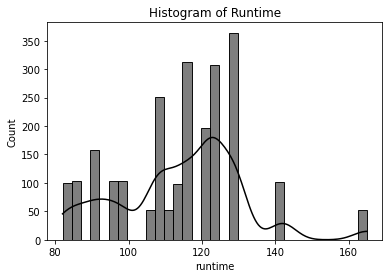

In [164]:
# Create the histogram with a a kernel density estimate (KDE) curve
sns.histplot(data=df_modified_merged, x="runtime", color="black", kde=True)

# Add a title
plt.title("Histogram of Runtime")

# Show the plot
plt.show()

In [165]:
df_modified_merged['production_budget_usd'].describe()

count        2356.00
mean     34623313.87
std      42902788.42
min          1100.00
25%       7000000.00
50%      20000000.00
75%      45000000.00
max     350000000.00
Name: production_budget_usd, dtype: float64

* The mean production budget is about USD 34.6 million, with a standard deviation of about USD 42.9 million this indicates that the data is quite spread out around the mean. 
* The minimum production budget is about USD 1,100 and the maximum production budget is about USD 350 million.
* The median for production budget used is 20 million which falls between the 25% percentile of USD 7 million and the 75th percentile of USD 45 million.


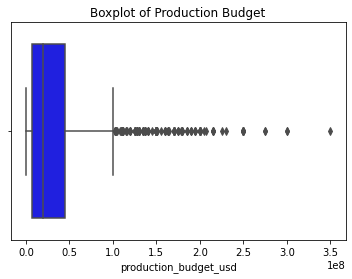

In [166]:
# Create the boxplot
sns.boxplot(data=df_modified_merged, x='production_budget_usd', color='blue')

# Add a title
plt.title("Boxplot of Production Budget")

# Show the plot
plt.show()

In [167]:
df_modified_merged['domestic_gross_usd'].describe()

count        2356.00
mean     45543251.36
std      67253075.58
min           527.00
25%       4269426.00
50%      23275439.00
75%      58538034.50
max     652270625.00
Name: domestic_gross_usd, dtype: float64

* The mean domestic_gross revenue is about USD 45.5 million, with a standard deviation of about 67.3 million, this indicates that the data is quite spread out around the mean. 
* The minimum domestic_gross revenue is USD 527 and the maximum domestic_gross revenue is USD 652.3 million. 
* The majority of the domestic_gross falls between USD4.26 million and USD 58.5 million, with the median domestic_gross revenue being USD 23.3 million.

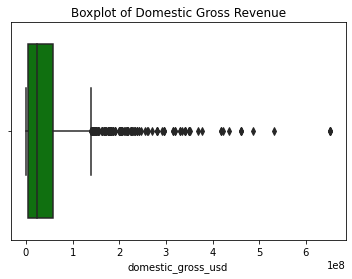

In [168]:
# Create the boxplot
sns.boxplot(data=df_modified_merged, x='domestic_gross_usd', color='green')

# Add a title
plt.title("Boxplot of Domestic Gross Revenue")

# Show the plot
plt.show()

In [169]:
df_modified_merged['worldwide_gross_usd'].describe()

count         2356.00
mean      98630604.24
std      175703743.96
min            527.00
25%        7934697.25
50%       38283765.00
75%      103880027.00
max     1648854864.00
Name: worldwide_gross_usd, dtype: float64

* The mean worldwide gross revenue is about 98.6 million, with a standard deviation of about 175.7 million, indicating that the data is quite spread out around the mean. 
* The minimum worldwide gross value is USD 527 and the maximum worldwide gross value is USD 1.65 billion.
* The majority of the worldwide gross value falls between USD 7.9 million and USD 103.9 million, with the median value being USD 38.3 million.

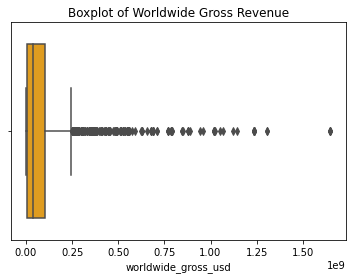

In [170]:
# Create the boxplot
sns.boxplot(data=df_modified_merged, x='worldwide_gross_usd', color='Orange')

# Add a title
plt.title("Boxplot of Worldwide Gross Revenue")

# Show the plot
plt.show()

### Lets answer our intial 3 business questions : 

    
#### What are the most popular genres of movies and what is the average runtime for popular movies?
We need to look at the movie genres and runtimes 


#### A). Most popular movie genres 

In [171]:
genre_count = df_modified_merged['genre'].value_counts()
genre_count

Drama                                                                   570
Comedy                                                                  347
Action and Adventure|Mystery and Suspense                               208
Comedy|Drama                                                            206
Art House and International|Drama|Musical and Performing Arts           156
Comedy|Kids and Family|Romance                                          147
Action and Adventure                                                    108
Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance          98
Comedy|Kids and Family                                                   53
Action and Adventure|Classics|Drama                                      53
Mystery and Suspense                                                     52
Classics|Comedy|Musical and Performing Arts|Romance                      52
Action and Adventure|Art House and International|Drama                   52
Comedy|Roman

In [172]:
#create a dataFrame of popular_genres
#sort the genre_count dataframe by count in descending order
popular_genres = genre_count.sort_values(ascending=False).head(8)
popular_genres

Drama                                                              570
Comedy                                                             347
Action and Adventure|Mystery and Suspense                          208
Comedy|Drama                                                       206
Art House and International|Drama|Musical and Performing Arts      156
Comedy|Kids and Family|Romance                                     147
Action and Adventure                                               108
Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance     98
Name: genre, dtype: int64

#### B. Runtimes per genre

In [173]:
#group the movies by genre
#calculate the mean/ average  runtime  per each genre
#Then sort values to see the figures in descending order
genre_runtimes = df_modified_merged.groupby('genre')['runtime'].mean().sort_values(ascending=False)
print(genre_runtimes)

genre
Action and Adventure|Classics|Drama                                    165.00
Action and Adventure|Mystery and Suspense                              123.00
Drama                                                                  122.63
Comedy|Drama                                                           120.29
Art House and International|Drama|Musical and Performing Arts          117.00
Drama|Sports and Fitness                                               116.00
Action and Adventure                                                   115.00
Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance        113.00
Action and Adventure|Art House and International|Drama                 110.00
Comedy|Kids and Family|Romance                                         108.00
Drama|Science Fiction and Fantasy                                      108.00
Mystery and Suspense                                                   108.00
Comedy                                                    

#### Most popular movie genres

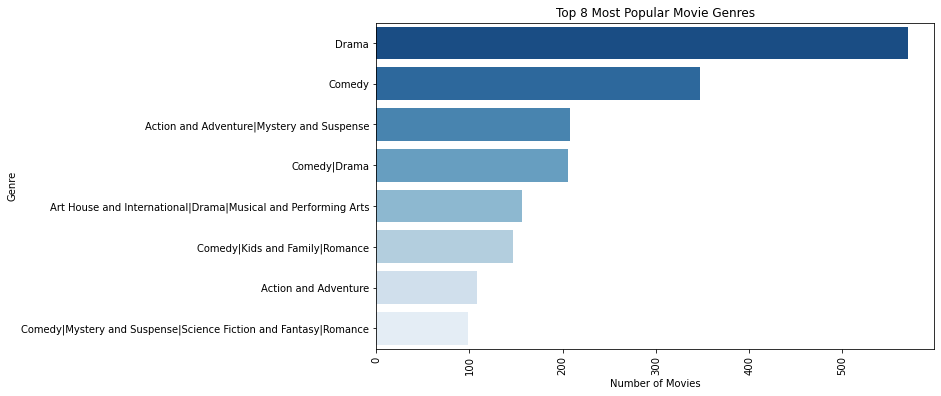

In [174]:
# create a horizontal bar plot of the top 8 genres
sns.set_style()
plt.figure(figsize=(10,6))

ax = sns.barplot(x=popular_genres.values, y=popular_genres.index, palette='Blues_r')

# set the x , y axis label and rotate the tick labels
ax.set_xlabel('Number of Movies')
plt.xticks(rotation=90)
ax.set_ylabel('Genre')
ax.set_title('Top 8 Most Popular Movie Genres')

plt.show()

#### Distribution of runtime

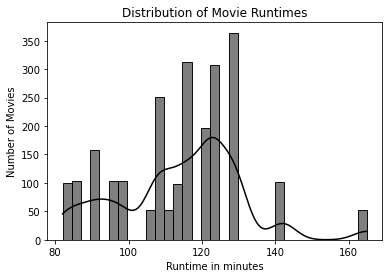

In [175]:
# create a histogram of movie runtimes using seaborn with a KDE curve
sns.histplot(data = df_modified_merged.runtime,color = 'black', kde = True)

# set the plot title, x-axis label, y-axis label
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime in minutes')
plt.ylabel('Number of Movies')

# display the plot
plt.show()

##### Top 8 Genres by Average Runtime

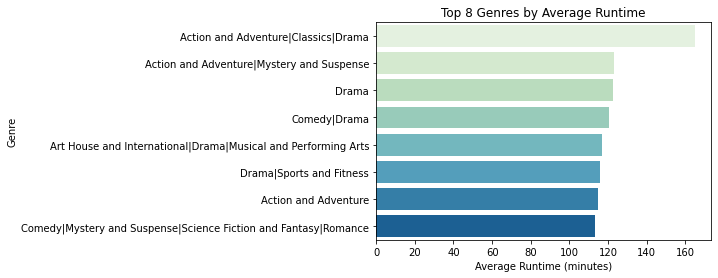

<Figure size 720x432 with 0 Axes>

In [176]:
# calculate the average runtime for each genre, sort by descending order, and select the top 8
genre_runtimes = df_modified_merged.groupby('genre')['runtime'].mean().sort_values(ascending=False).head(8)

# create a horizontal bar plot using seaborn
sns.barplot(x=genre_runtimes, y=genre_runtimes.index, palette='GnBu')

# set the plot title, x-axis label, and y-axis label
plt.title('Top 8 Genres by Average Runtime')
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Genre')

# set the figure size
plt.figure(figsize=(10,6))

# display the plot
plt.show()


##### What is the relationship between a movie's production budget and the revenue made?

its an expectation that movies with higher production budgets will generate higher revenues, but this relationship is not always straightforward. A movie's success is influenced by various factors, such as the quality of the script, the skill of the director, the popularity of the actors, and the timing of the release, among others. 

To identify the relationship between the production budget and revenue in our data set we can create a scatter plot of budget vs revenues. 

This would allows us to inspect trends  and patterns.
We can also quantify the return on investment (ROI) for each movie. This can be calculated as the ratio of worldwide gross revenue to production budget.

in the process this would allow us to compare the profitability of movies with different budgets and revenue levels.



##### Production budget vs. worldwide gross revenue

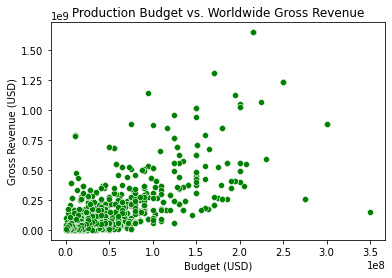

In [177]:
#Create a scatter plot of production budget vs. worldwide gross revenue
# create a scatter plot using seaborn
sns.scatterplot(x='production_budget_usd', y='worldwide_gross_usd', data=df_modified_merged, color='green')

# set the plot title, x-axis label, and y-axis label
plt.title('Production Budget vs. Worldwide Gross Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Gross Revenue (USD)')

# display the plot
plt.show()


It can be noted, that not always that movies with higher production budgets will generate high revenues.  
For Example : Movies with a budget of USD 1.5 Million dollars had varying revenues. Meaning other factors were in play.


#### Movies based on ROI 

In [178]:
#seems we have an outlier in the data 
# Remove outlier from dataframe by create a new dataframe 
#that contains all rows from df_modified_merged where the ROI value is less than 150.
df_modified_merged = df_modified_merged[df_modified_merged['ROI'] <=150]

In [179]:
#Identify the top 1000 movies based of their Return on investment
df_top_1000 = df_modified_merged.sort_values(by='ROI', ascending=False).head(1000)


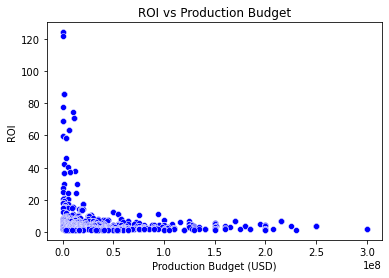

In [180]:
# Create a seaborn scatter plot of ROI vs. production budget 
sns.scatterplot(x='production_budget_usd', y='ROI', data=df_top_1000, color='blue')

# set the plot title, x-axis label, and y-axis label
plt.title('ROI vs Production Budget')
plt.xlabel('Production Budget (USD)')
plt.ylabel('ROI')

# display the plot
plt.show()

it can be noted from above that the Return on investment (ROI) is not guaranteed by the production budget used . 

The scatter plot shows very little correlation between the ROI and investment put in. 


##### How do movie ratings and reviews impact the overal revenue?


In [181]:
corr_coef = np.corrcoef(df_modified_merged['worldwide_gross_usd'], df_modified_merged['rating_y'])[0, 1]
corr_coef

-0.01802876105675924

* The value of -0.018358351301180985 indicates a very weak negative correlation between the two variables. 
* This means that there is a slight tendency for movies with higher ratings to have slightly lower worldwide gross revenue, but the relationship is not very strong.

* A weak and negative correlation was observed between this 2 variables 

Movies will little to no revenue gathered as many ratings as movies with higher revenues.

Movies with higher revenues gathered less ratings than would have been expected. 


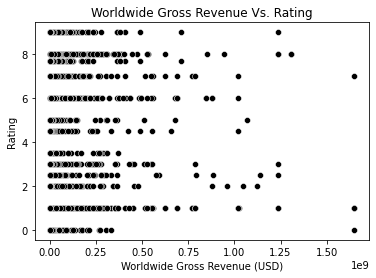

In [182]:
# create a scatter plot of Revenue vs. Ratings
sns.scatterplot(x='worldwide_gross_usd', y= 'rating_y', data=df_modified_merged,color = 'black')

# set the x-axis label and rotate the tick labels
plt.xlabel('Worldwide Gross Revenue (USD)')

# set the y-axis label
plt.ylabel('Rating')

# set the title of the plot
plt.title('Worldwide Gross Revenue Vs. Rating')

# display the plot
plt.show()

##### is there a correlation between production budgets and ratings? 

In [183]:
corr_coef = np.corrcoef(df_modified_merged['production_budget_usd'], df_modified_merged['rating_y'])[0, 1]
corr_coef

0.007785645101974284

* The value of 0.0071651084685253495 indicates a very weak positive correlation between the two variables. 
* This means that there is a slight tendency for movies with higher production budgets to have slightly higher ratings, but the relationship is not very strong.
* lets plot and see.

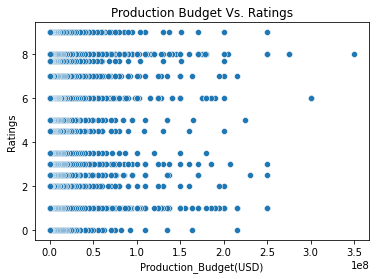

In [184]:
# create a scatter plot of Revenue vs. Ratings
sns.scatterplot(x='production_budget_usd', y= 'rating_y', data=df_modified_merged)

# set the x-axis label and rotate the tick labels
plt.xlabel('Production_Budget(USD)')

# set the y-axis label
plt.ylabel('Ratings')

# set the title of the plot
plt.title('Production Budget Vs. Ratings')

# display the plot
plt.show()

## SUMMARY OF RESULTS

After analyzing the DataFrame df_modified_merged, several interesting results were found.
 
 * The average runtime for movies in the dataset was 114  minutes.
 
 * No movie had a runtime of less than 82 min
 
 * The Average movie production budget spent by movie makers in this dataset was 34.6 Million however, majority of movies spent between USD 7 million and USD 45 million.
 
 * The highest budget amount was USD 350 Million.
 
 * A movie's worldwide revenue can range from USD 7 Million to USD 103 Million for majority of the movie makers however, one movie maker made as low as USD 527
 
 * The highest worldwide gross revenue registered was USD 1.65Billion.
 
 * Drama genre was the most popular genre with over 500 number of movies followed by Comedy with 350.
 
 * Action & Adventure|Classics| Drama had the highest average runtime among all the genres present. 
 
* Drama came third followed by Comedy|Drama which were very near the mean of 114 minutes.

* On carrying out the bivariant analysis:
   * It was concluded that higher production budgets will not always guarantee  high revenues or return on investment.
   
   * There is a negative weak correlation observed between worldwide gross revenue and ratings.
   
   * A slight tendency was noted on movies with higher production budgets to have slightly higher ratings, but the relationship is not very strong.


 

## RECOMMENDATIONS TO CONSIDER:  

##### Genre  and Runtime
* To Invest in drama and comedy movies as they are the most popular genres.
* To Keep in mind the appropriate length of each movie . The average mean is 114 minutes

##### Budgets & Ratings
* Although the average production budget spent by movie makers in this dataset was 34.6 Million, consider that the majority of movies spent between USD 7 million and USD 45 million. 
* This means a lower budget can always be utilized. 
* Microsoft should not solely rely on higher production budgets as a guarantee for higher ratings or revenues.

##### Revenue & Ratings
* Microsoft should keep in mind that there is a weak negative correlation between worldwide gross revenue and movie ratings.
* This means that having high ratings does not necessarily guarantee high revenues.
* Thus should not rely heavily on ratings.


## CONCLUSION

Finally, Microsoft should keep in mind that while the majority of movies in the dataset generated between USD 7 Million and USD 103 Million in worldwide revenue, the highest worldwide gross revenue registered was USD 1.65 Billion. 
Therefore, it is important to remain open to the possibility of high revenue generation, and not limit investment opportunities based on past revenue trends.
